# <a id='0'>BITCOIN.</h1>
![BITCOIN-logo](..\src\utils\bitcoin.jpg)

- ## <a href='#1'>1. Introduccion</a> 

<b></b>
- ##  <a href='#2'>2. Librerias</a>

<b></b>
- ##  <a href='#3'>3. Limpieza de Datos</a>

<b></b>
- ##  <a href='#4'>4. Entrenamiento del Modelo</a>

<b></b>
- ##  <a href='#5'>5. Prueba del Modelo</a>

# <a id='1'>1. Introduccion</a>

#### El siguiente proyecto es sobre la construccion de un modelo de serie temporal sobre el Bitcoin.

Este proyecto consiste en crear un modelo de ML que logre predecir el precio del Bitcoin.


### Si necesita contactarme:
* Email: **jamr1989@gmail.com**
* Linkedin: **https://www.linkedin.com/in/JuanManiglia**

#### Check my repo in Github: **https://github.com/JuanManiglia**

# <a id='2'>2. Librerias</a> 

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import math
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# <a id='3'>3. Librerias</a> 

In [2]:
data=pd.read_csv("BTC_USD.csv")

In [5]:
data

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,31.12.2021,46218.0,47156.0,48589.0,45697.0,4.25K,"-1,99%"
1,30.12.2021,47156.0,46465.0,47911.0,45996.0,3.20K,"1,49%"
2,29.12.2021,46465.0,47554.0,48166.0,46129.0,4.12K,"-2,29%"
3,28.12.2021,47554.0,50684.0,50710.0,47339.0,5.43K,"-6,18%"
4,27.12.2021,50684.0,50797.0,52027.0,50483.0,3.52K,"-0,22%"
...,...,...,...,...,...,...,...
3612,06.02.2012,5.4,5.4,5.4,5.4,-,"-4,22%"
3613,05.02.2012,5.7,5.7,5.7,5.7,-,"-3,07%"
3614,04.02.2012,5.9,5.9,5.9,5.9,-,"-1,51%"
3615,03.02.2012,6.0,6.0,6.0,6.0,-,"-2,30%"


In [4]:
for x,c in enumerate(data['Último']):
    data['Último'][x] = c.replace('.','')
for x,c in enumerate(data['Último']):
    data['Último'][x] = c.replace(',','.')
for x,c in enumerate(data['Apertura']):
    data['Apertura'][x] = c.replace('.','')
for x,c in enumerate(data['Apertura']):
    data['Apertura'][x] = c.replace(',','.')
for x,c in enumerate(data['Máximo']):
    data['Máximo'][x] = c.replace('.','')
for x,c in enumerate(data['Máximo']):
    data['Máximo'][x] = c.replace(',','.')
for x,c in enumerate(data['Mínimo']):
    data['Mínimo'][x] = c.replace('.','')
for x,c in enumerate(data['Mínimo']):
    data['Mínimo'][x] = c.replace(',','.')
for x,c in enumerate(data['Vol.']):
    data['Vol.'][x] = c.replace(',','.')


In [6]:
data['Fecha'] = pd.to_datetime(data['Fecha'])

In [8]:
data['Último'] = data['Último'].astype('float')
data['Apertura'] = data['Apertura'].astype('float')
data['Máximo'] = data['Máximo'].astype('float')
data['Mínimo'] = data['Mínimo'].astype('float')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617 entries, 0 to 3616
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3617 non-null   datetime64[ns]
 1   Último    3617 non-null   float64       
 2   Apertura  3617 non-null   float64       
 3   Máximo    3617 non-null   float64       
 4   Mínimo    3617 non-null   float64       
 5   Vol.      3617 non-null   object        
 6   % var.    3617 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 197.9+ KB


In [10]:
data=data.set_index('Fecha')

In [11]:
data

,Último,Apertura,Máximo,Mínimo,Vol.,% var.
Fecha,,,,,,
2021-12-31,46218.0,47156.0,48589.0,45697.0,4.25K,"-1,99%"
2021-12-30,47156.0,46465.0,47911.0,45996.0,3.20K,"1,49%"
2021-12-29,46465.0,47554.0,48166.0,46129.0,4.12K,"-2,29%"
2021-12-28,47554.0,50684.0,50710.0,47339.0,5.43K,"-6,18%"
2021-12-27,50684.0,50797.0,52027.0,50483.0,3.52K,"-0,22%"
...,...,...,...,...,...,...
2012-06-02,5.4,5.4,5.4,5.4,-,"-4,22%"
2012-05-02,5.7,5.7,5.7,5.7,-,"-3,07%"
2012-04-02,5.9,5.9,5.9,5.9,-,"-1,51%"


In [27]:
data = data.sort_index(ascending=True)

In [28]:
data

,Último
Fecha,
2012-01-03,4.9
2012-01-04,4.8
2012-01-05,5.0
2012-01-06,5.3
2012-01-07,6.6
...,...
2021-12-27,50684.0
2021-12-28,47554.0
2021-12-29,46465.0


# <a id='4'>4. Entrenamiento del Modelo</a> 

In [56]:
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

 
train_data = scaled_data[0:training_data_len, :]


x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
  

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
tf.keras.callbacks.EarlyStopping(
    'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Model
model =Sequential() 
model.add(LSTM(512, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics =["accuracy"])
model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[es_callback])

test_data=scaled_data[training_data_len - 60:,:]
x_test= []
y_test= dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
x_test =np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
70/71 [============================>.] - ETA: 0s - loss: 5.1936e-04 - accuracy: 0.0000e+00WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017A61D1D0D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

In [57]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(r2_score(y_test, predictions))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0.9196436990558886


C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


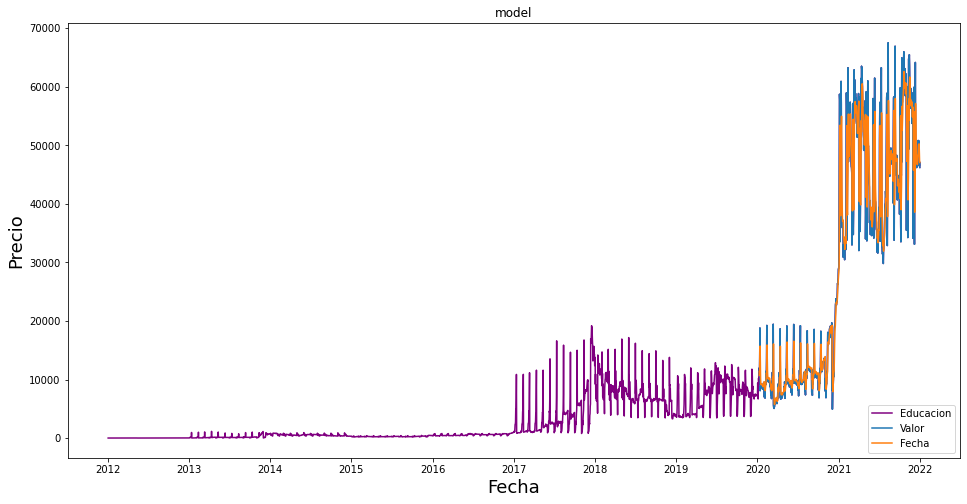

In [58]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Fecha']= predictions

plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio', fontsize=18)
plt.plot(data['Último'],color="purple")
plt.plot(valid[['Último','Fecha']])
plt.legend(['Educacion','Valor','Fecha'],loc='lower right')
plt.show()


C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


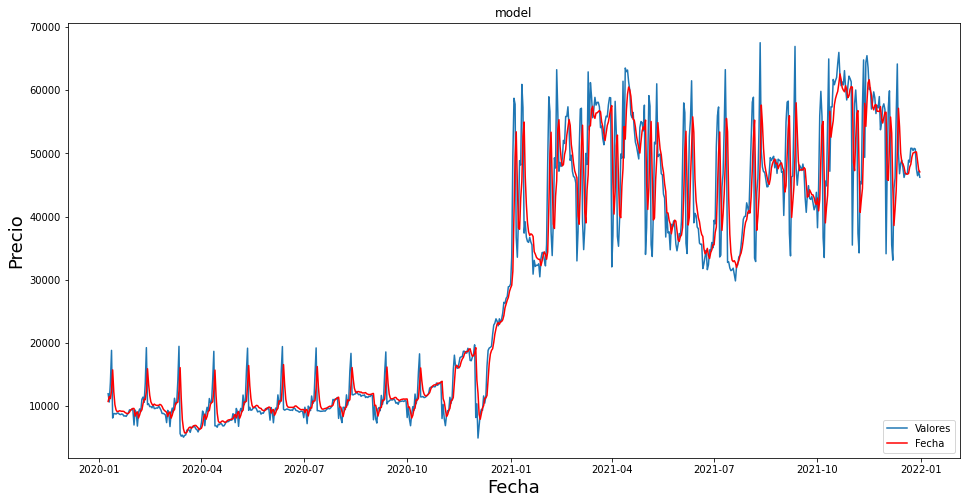

In [59]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Fecha']= predictions

plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio', fontsize=18)
plt.plot(valid['Último'])
plt.plot(valid[["Fecha"]],color="Red")
plt.legend(['Valores','Fecha'],loc='lower right')

# <a id='5'>5. Prueba de Modelo</a> 

In [60]:
dataset = data.values
training_data_len = math.ceil(len(dataset) * .9)
train_dataa= dataset[0:training_data_len, :]
test_dataa=dataset[training_data_len - 60:,:]
train_dataa=pd.DataFrame(train_dataa)
train_dataa.rename(columns={0:'Último'}, inplace=True)
test_dataa=pd.DataFrame(test_dataa)
test_dataa.rename(columns={0:'Último'}, inplace=True)
total_dataset=pd.concat((train_dataa["Último"],test_dataa["Último"]),axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-60:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)



real_data=[model_inputs[len(model_inputs) +1-61:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)

print(f"prediction for next day :{prediction}")

prediction for next day :[[46598.203]]
